---
- #  Import
---

In [1]:
import pydicom as dicom
import matplotlib.pyplot as plt
import numpy as np
import os

---
- #  Get all the dicom file paths in folder


In [2]:
path = "./PAT034"
dcm_paths = os.listdir(path)

print(dcm_paths)

['D0001.dcm', 'D0002.dcm', 'D0003.dcm', 'D0004.dcm', 'D0005.dcm', 'D0006.dcm', 'D0007.dcm', 'D0008.dcm', 'D0009.dcm', 'D0010.dcm', 'D0011.dcm', 'D0012.dcm', 'D0013.dcm', 'D0014.dcm', 'D0015.dcm', 'D0016.dcm', 'D0017.dcm', 'D0018.dcm', 'D0019.dcm', 'D0020.dcm', 'D0021.dcm', 'D0022.dcm', 'D0023.dcm', 'D0024.dcm', 'D0025.dcm', 'D0026.dcm', 'D0027.dcm', 'D0028.dcm', 'D0029.dcm', 'D0030.dcm', 'D0031.dcm', 'D0032.dcm', 'D0033.dcm', 'D0034.dcm', 'D0035.dcm', 'D0036.dcm', 'D0037.dcm', 'D0038.dcm', 'D0039.dcm', 'D0040.dcm', 'D0041.dcm', 'D0042.dcm', 'D0043.dcm', 'D0044.dcm', 'D0045.dcm', 'D0046.dcm', 'D0047.dcm', 'D0048.dcm', 'D0049.dcm', 'D0050.dcm', 'D0051.dcm', 'D0052.dcm', 'D0053.dcm', 'D0054.dcm', 'D0055.dcm', 'D0056.dcm', 'D0057.dcm', 'D0058.dcm', 'D0059.dcm', 'D0060.dcm', 'D0061.dcm', 'D0062.dcm', 'D0063.dcm', 'D0064.dcm', 'D0065.dcm', 'D0066.dcm', 'D0067.dcm', 'D0068.dcm', 'D0069.dcm', 'D0070.dcm', 'D0071.dcm', 'D0072.dcm', 'D0073.dcm', 'D0074.dcm', 'D0075.dcm', 'D0076.dcm', 'D0077.dcm'

---
- #  Read all the dicom files in the dcm_paths


In [3]:
dcm_files = []

for file_name in dcm_paths:
    full_path = path + f"/{file_name}"
    temp_dicom = dicom.dcmread(full_path)
    dcm_files.append(temp_dicom)

print(dcm_files[10]) # print out the 10th file
    

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.214408481411028294912321317190122210624
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELICAL']
(0008, 0012) Instance Creation Date              DA: '0'
(0008, 0013) Instance Creation Time              TM: '160223.640'
(0008, 0016) SOP Class UID                       UI: CT Image Storage

---
- #  Sort the files by attribute: <i><b>ImagePositionPatient</b> 
## => ImagePositionPatient: position of the slice in patient's body (3D)


In [4]:
dcm_files = sorted(dcm_files, key = lambda file: file.ImagePositionPatient[2]) #sort by z-axis

for file in dcm_files:
    print(file.ImagePositionPatient)

[-146.5, -181.5, -795.5]
[-146.5, -181.5, -794.5]
[-146.5, -181.5, -793.5]
[-146.5, -181.5, -792.5]
[-146.5, -181.5, -791.5]
[-146.5, -181.5, -790.5]
[-146.5, -181.5, -789.5]
[-146.5, -181.5, -788.5]
[-146.5, -181.5, -787.5]
[-146.5, -181.5, -786.5]
[-146.5, -181.5, -785.5]
[-146.5, -181.5, -784.5]
[-146.5, -181.5, -783.5]
[-146.5, -181.5, -782.5]
[-146.5, -181.5, -781.5]
[-146.5, -181.5, -780.5]
[-146.5, -181.5, -779.5]
[-146.5, -181.5, -778.5]
[-146.5, -181.5, -777.5]
[-146.5, -181.5, -776.5]
[-146.5, -181.5, -775.5]
[-146.5, -181.5, -774.5]
[-146.5, -181.5, -773.5]
[-146.5, -181.5, -772.5]
[-146.5, -181.5, -771.5]
[-146.5, -181.5, -770.5]
[-146.5, -181.5, -769.5]
[-146.5, -181.5, -768.5]
[-146.5, -181.5, -767.5]
[-146.5, -181.5, -766.5]
[-146.5, -181.5, -765.5]
[-146.5, -181.5, -764.5]
[-146.5, -181.5, -763.5]
[-146.5, -181.5, -762.5]
[-146.5, -181.5, -761.5]
[-146.5, -181.5, -760.5]
[-146.5, -181.5, -759.5]
[-146.5, -181.5, -758.5]
[-146.5, -181.5, -757.5]
[-146.5, -181.5, -756.5]


---
- #  Get <i><b>pixel spacing</b></i> & <i><b>slice_thickness</b></i>


Pixel spacing and slice thickness are essential attributes in DICOM files that provide critical information about the size and spacing of pixels (2D images) or voxels (3D volumes) in medical images. They play a role in helping classify DICOM files into axial, coronal, or sagittal views.

## <ul> 1. Pixel Spacing:
<li> Definition: Pixel spacing specifies the physical size of each pixel in the X and Y dimensions of a 2D image, typically in millimeters. It determines the dimensions of the pixel grid that represents the 2D image.
<li> Role in Classification:
<ul> 
    <li> In an axial view, the pixel spacing in the X and Y dimensions is roughly equal, and the slice thickness (Z spacing) is usually greater. The Z spacing represents the space between consecutive axial slices.
    <li> In a coronal view, the pixel spacing in the X dimension is larger than in the Y dimension.
    <li> In a sagittal view, the pixel spacing in the Y dimension is larger than in the X dimension.
</ul>
<li> Pixel spacing is used along with the slice thickness to determine the orientation and aspect ratio of the image grid, which helps classify the image view.
</ul>

## <ul> 2. Slice Thickness:
<li> Definition: Slice thickness represents the physical distance between adjacent image slices (axial slices in particular), typically in millimeters. It provides information about the separation between consecutive slices.
<li> Role in Classification:
<ul>
    <li> In an axial view, slice thickness is often greater, indicating that the spacing between slices along the Z-axis is significant.
    <li> In a coronal view, slice thickness may be smaller, as the spacing between coronal slices is typically less.
    <li> In a sagittal view, slice thickness can also be smaller, indicating a closer spacing between sagittal slices.
</ul>
<li> Slice thickness is used to identify the spacing between the slices and is one of the factors used for view classification.
</ul>


In [5]:
pixel_spacings = dcm_files[0].PixelSpacing
slice_thickness = dcm_files[0].SliceThickness
print(f"pixel spacing: {pixel_spacings}")
print(f"slice thickness: {slice_thickness}")


pixel spacing: [0.708984, 0.708984]
slice thickness: 1


---
- #  Get Aspect Ratios of coordinates

In [6]:
axial_aspect_ratio = pixel_spacings[1] / pixel_spacings[0] # y / x
sagital_aspect_ratios = pixel_spacings[1] / slice_thickness # y / z
coronal_aspect_ratios = slice_thickness / pixel_spacings[0] # z / x

print(f"axial ratio = {axial_aspect_ratio}")
print(f"sagital ratio = {sagital_aspect_ratios}")
print(f"coronal ratio = {coronal_aspect_ratios}")

axial ratio = 1.0
sagital ratio = 0.708984
coronal ratio = 1.4104690655924534


- #  Get <b><i>3D</i></b> Image Shape

In [7]:
image_shape_x = dcm_files[0].pixel_array.shape[0]
image_shape_y = dcm_files[0].pixel_array.shape[1]
image_shape_z = len(dcm_files)

image_shape = (image_shape_x, image_shape_y, image_shape_z)

print(image_shape)


(512, 512, 189)


---
#  Create multiple perspective image

 - ### Create <b><i>volume<i></b> for 3D Image (3D matrix)

In [8]:
img_3d_matrix = np.zeros(image_shape) # create zeros 3d matrix 

- ### Insert values for the 3D matrix

In [9]:
# Create a list contains all the slice image (2D matrices)
slice_imgs = []
for file in dcm_files:
    slice_imgs.append(file.pixel_array)

# Insert each slice into 3d image (3D matrix)
for i in range(image_shape_z):
    slice_img = slice_imgs[i]
    img_3d_matrix[:, :, i] = slice_img

print(img_3d_matrix)

[[[  25.   22.   15. ...   32.   35.   25.]
  [  28.   24.   28. ...   27.   30.   27.]
  [  33.   31.   31. ...   20.   16.   27.]
  ...
  [  25.   25.   25. ...   25.   25.   25.]
  [  25.   25.   25. ...   25.   25.   25.]
  [  25.   25.   25. ...   25.   25.   25.]]

 [[  14.   17.   23. ...   28.   42.   25.]
  [  27.   23.   23. ...   37.   42.   22.]
  [  30.   32.   25. ...   29.   19.   22.]
  ...
  [  25.   25.   25. ...   25.   25.   25.]
  [  25.   25.   25. ...   25.   25.   25.]
  [  25.   25.   25. ...   25.   25.   25.]]

 [[   4.   26.   22. ...   26.   37.   25.]
  [  16.   20.   26. ...   39.   46.   24.]
  [  30.   28.   35. ...   33.   32.   25.]
  ...
  [  25.   25.   25. ...   25.   25.   25.]
  [  25.   25.   25. ...   25.   25.   25.]
  [  25.   25.   25. ...   25.   25.   25.]]

 ...

 [[ 648.  627.  621. ...   42.   41.   27.]
  [ 868.  852.  849. ...   45.   39.   26.]
  [1064. 1059. 1046. ...   45.   32.   31.]
  ...
  [  25.   25.   25. ...   25.   25.   2

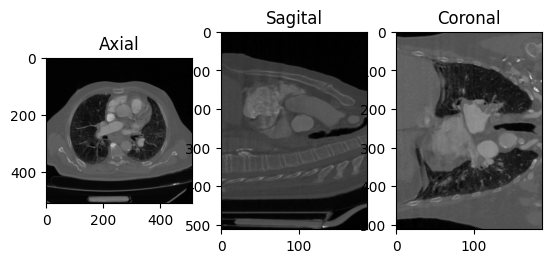

In [10]:
axial = plt.subplot(1, 3, 1)
plt.title("Axial")
plt.imshow(img_3d_matrix[:, :, image_shape_z//2], cmap="gray")
axial.set_aspect(axial_aspect_ratio)

sagital = plt.subplot(1, 3, 2)
plt.title("Sagital")
plt.imshow(img_3d_matrix[:, image_shape_y//2,:], cmap="gray")
sagital.set_aspect(0.5)

coronal = plt.subplot(1, 3, 3)
plt.title("Coronal")
plt.imshow(img_3d_matrix[image_shape_x//2, :, :], cmap="gray")
coronal.set_aspect(0.5)
plt.show()


# export sagital images

In [11]:
for i in range(image_shape_y):
    plt.imsave(f"./sagital_imgs_output/sagital0{i}.jpg", img_3d_matrix[:, i, :], cmap = "gray")

# export coronal images

In [15]:
for i in range(image_shape_y):
    plt.imsave(f"./coronal_imgs_output/coronal0{i}.jpg", img_3d_matrix[i,: , :], cmap = "gray")